# Mini Project 3 - II. Dimensional Reduction
Apply dimensionality reduction using PCA and select only the two most important components from the word embedding, and plot each word representation on a 2D graph.

In [12]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pathlib

In [13]:
def load_and_plot_data(file_word_embbedings, file_word_to_index, graph_name='2D PCA of Word Embeddings'):
    word_to_embeddings = np.load(file_word_embbedings, allow_pickle=True).item()
    
    word_to_index = np.load(file_word_to_index, allow_pickle=True).item()
    index_to_word = {v: k for k, v in word_to_index.items()}

    # Create an array of array 50-dimensional with zeros
    embeddings_array = np.zeros((len(word_to_embeddings), 50))

    for word, embedding in word_to_embeddings.items():
        index = word_to_index[word]
        embeddings_array[index] = embedding

    # Fit PCA on the embeddings
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings_array)

    reduced_word_embeddings = {}
    plt.figure(figsize=(20, 10))
    for i, embedding in enumerate(reduced_embeddings):
        word = index_to_word[i]
        reduced_word_embeddings[word] = embedding
        x, y = embedding
        plt.scatter(x, y)
        plt.text(x + 0.01, y + 0.01, word, fontsize=9, font=pathlib.Path('KhmerOSContent-Regular.ttf'))

    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(graph_name)
    plt.show()
    
    return reduced_word_embeddings

### Load Word Embeddings

In [4]:
file_word_embbedings = "word_to_embedding1.npy" # Change as you prefer

In [5]:
word_to_embeddings = np.load(file_word_embbedings, allow_pickle=True).item()
word_to_embeddings

{'ខ្លួន': array([ 0.21340148,  0.32470361,  0.69745986,  0.19054946, -0.27560519,
         0.35923483,  0.07163714,  1.05896954, -0.61843234, -0.06154804,
        -0.55625035, -0.39807952,  1.07736931,  0.10801539,  0.31400933,
         0.0420883 ,  0.22902091,  1.20176878, -0.01597431, -1.08306358,
        -1.34571826,  0.19232303,  0.20287169, -0.78539903, -0.8500919 ,
        -0.29465657,  1.56370045, -0.07543935,  0.20092988,  0.83509585,
         0.64099669,  1.58254334,  0.00732707,  0.72543425,  0.58920834,
         1.00678309,  0.90231835, -0.76563658,  0.83600675, -1.73554392,
         0.49414274,  0.35729702, -0.3067268 ,  0.96642847, -0.88876161,
        -0.76701405, -0.01018379,  1.12162882, -0.30413813, -0.12410819]),
 'ជាមួយ': array([-0.51645465,  1.35285992,  0.08965934,  0.64340749, -0.18273534,
         0.27235766,  0.30855511,  1.51839112,  0.13584151, -0.65241704,
        -0.45041749, -0.22051243, -0.13673921,  0.45707649, -0.18813585,
         0.07699467, -0.8303785

In [6]:
word_to_index = np.load("word_to_index.npy", allow_pickle=True).item()

In [7]:
index_to_word = {v: k for k, v in word_to_index.items()}
vocabs = word_to_index.keys()

len(vocabs), word_to_index, index_to_word

(175,
 {'ខ្លួន': 0,
  'ជាមួយ': 1,
  'ច្រក': 2,
  'ហើយ': 3,
  'ដំបូង': 4,
  'វិញ': 5,
  'ទេវតា': 6,
  'ខាងលិច': 7,
  'ហៅ': 8,
  'ចំពោះ': 9,
  'វា': 10,
  'តូច': 11,
  'ចុង': 12,
  'ខ្ពស់': 13,
  'ន័យ': 14,
  'ជុំវិញ': 15,
  'ជាង': 16,
  'ខាង': 17,
  'ទី': 18,
  'ថែវ': 19,
  'វរ្ម័ន': 20,
  'ឈ្មោះ': 21,
  'នៃ': 22,
  'បុរាណ': 23,
  'ពិភពលោក': 24,
  'ក្រុម': 25,
  'ភក់': 26,
  'គេ': 27,
  'ចំនួន': 28,
  'បារាំង': 29,
  'កណ្តាល': 30,
  'ចម្លាក់': 31,
  'រាជធានី': 32,
  'ប្រជាជន': 33,
  'ពេល': 34,
  'ក្នុង': 35,
  'មិន': 36,
  'ចេញ': 37,
  'តាម': 38,
  'នៅក្នុង': 39,
  'ខ្លះ': 40,
  'ធ្វើ': 41,
  'គ្នា': 42,
  'ដើម': 43,
  'គឺជា': 44,
  'ភាគ': 45,
  'ទៀត': 46,
  'ប្រាង្គ': 47,
  'និង': 48,
  'ទៅ': 49,
  'គឺ': 50,
  'កម្ពុជា': 51,
  'ស្រាល': 52,
  'ទី២': 53,
  'ទេសចរណ៍': 54,
  'លើ': 55,
  'នគរ': 56,
  'ថា': 57,
  'មួយ': 58,
  'ផ្នែក': 59,
  'ពីរ': 60,
  'អង្គរ': 61,
  'នោះ': 62,
  'សាសនា': 63,
  'សតវត្ស': 64,
  'កន្លែង': 65,
  'ផ្សេង': 66,
  'គោ': 67,
  'ខាងក្រៅ': 68,
  'ខេត្ត': 69,
  'ឡើង':

In [8]:
# Create an array of array 50-dimensional with zeros
embeddings_array = np.zeros((len(word_to_embeddings), 50))

for word, embedding in word_to_embeddings.items():
    index = word_to_index[word]
    embeddings_array[index] = embedding

embeddings_array

array([[ 0.21340148,  0.32470361,  0.69745986, ...,  1.12162882,
        -0.30413813, -0.12410819],
       [-0.51645465,  1.35285992,  0.08965934, ...,  1.12663862,
        -0.45942553,  0.27753451],
       [ 0.96830753,  1.29483315,  0.85214276, ...,  1.28379047,
        -0.41848447,  0.61686994],
       ...,
       [-0.262446  ,  0.96939829,  1.11706555, ...,  0.11274825,
         0.0336836 ,  0.08210868],
       [ 0.25695119,  1.22850009,  1.43597057, ...,  0.26201097,
        -0.01356582, -0.86415079],
       [ 0.15314595,  0.9075294 ,  1.6748801 , ...,  0.63474597,
         0.31339339,  0.00893765]])

### Apply PCA

In [9]:
# Fit PCA on the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_array)

#### Plot the graph

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 85 (U) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78 (N) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 75 (K) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

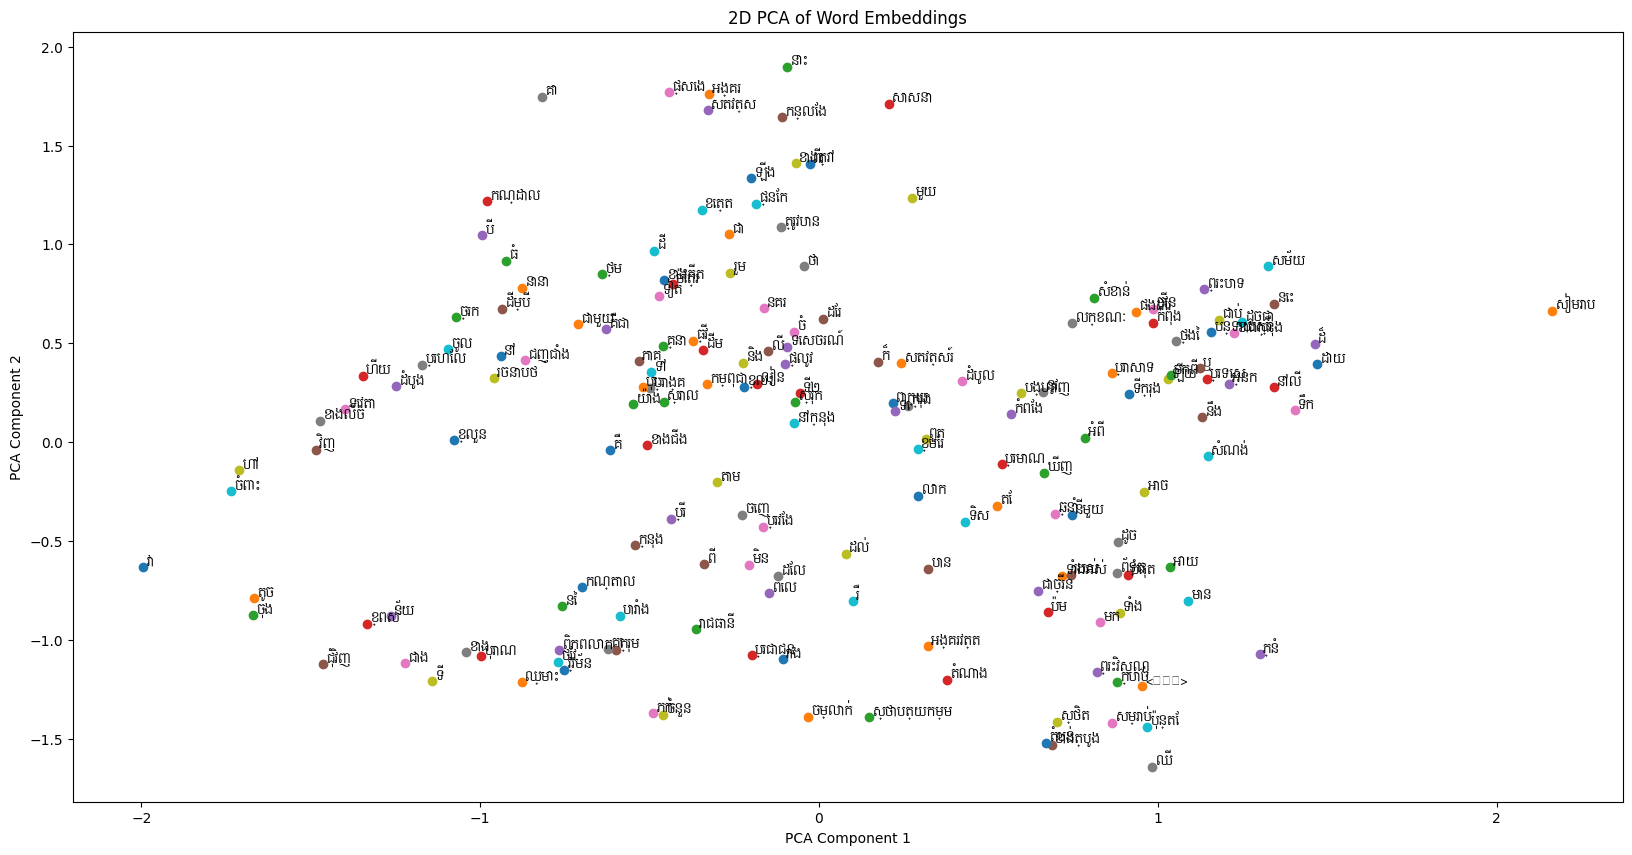

In [10]:
import pathlib

plt.figure(figsize=(20, 10))
for i, embedding in enumerate(reduced_embeddings):
    word = index_to_word[i]
    x, y = embedding
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=9, font=pathlib.Path('KhmerOSContent-Regular.ttf'))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of Word Embeddings')
plt.show()

## Plot All Results

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 85 (U) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78 (N) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 75 (K) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

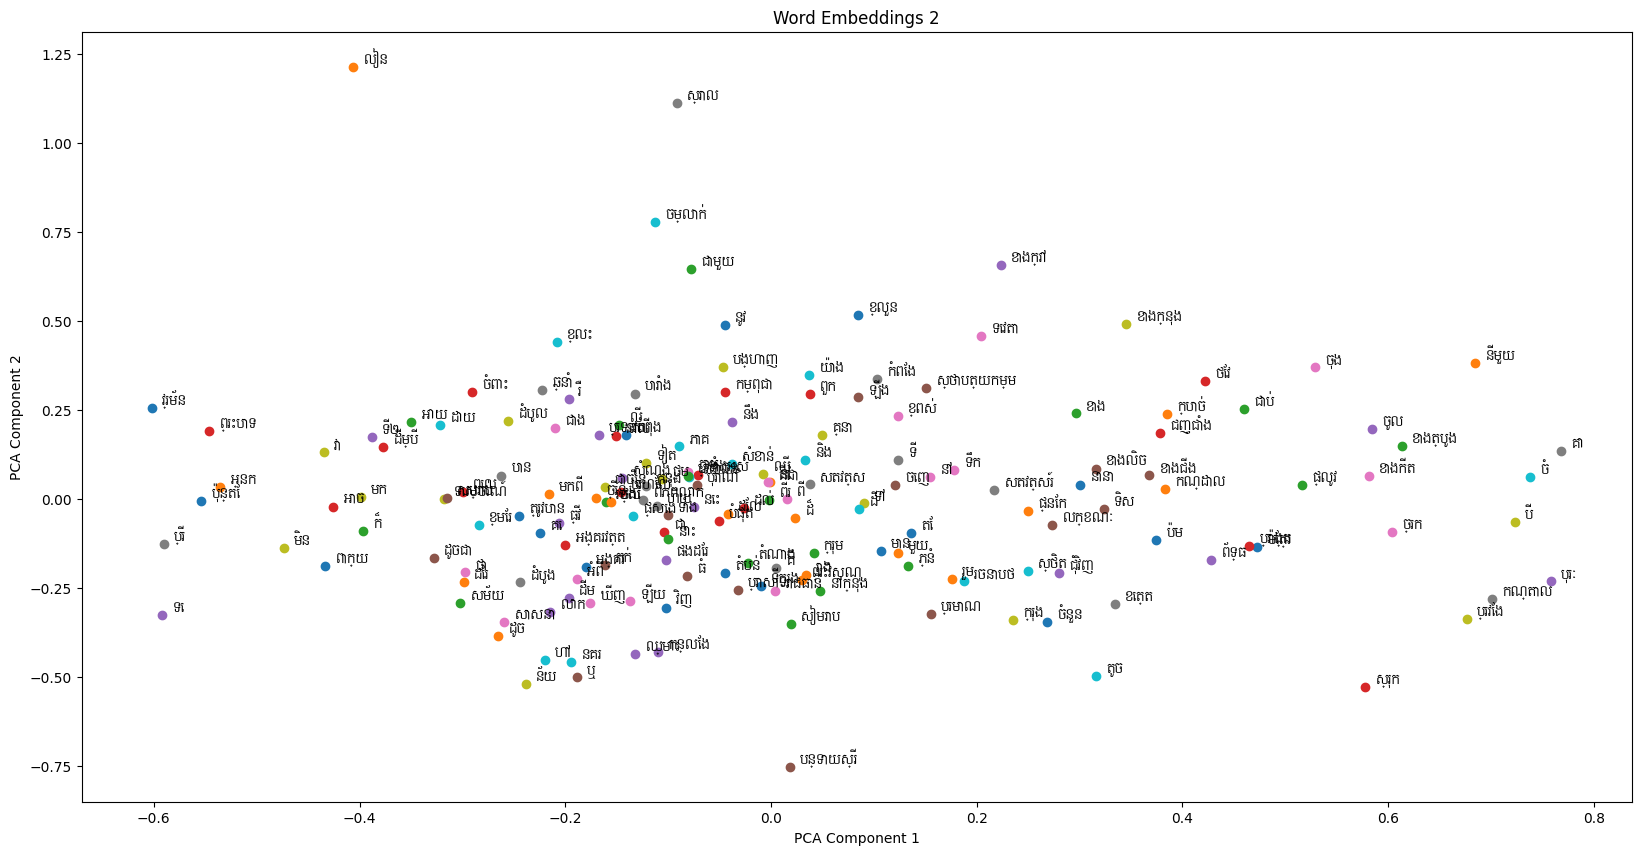

In [12]:
graph2 = load_and_plot_data("word_to_embedding2.npy", "word_to_index.npy", "Word Embeddings 2")

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 85 (U) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78 (N) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 75 (K) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

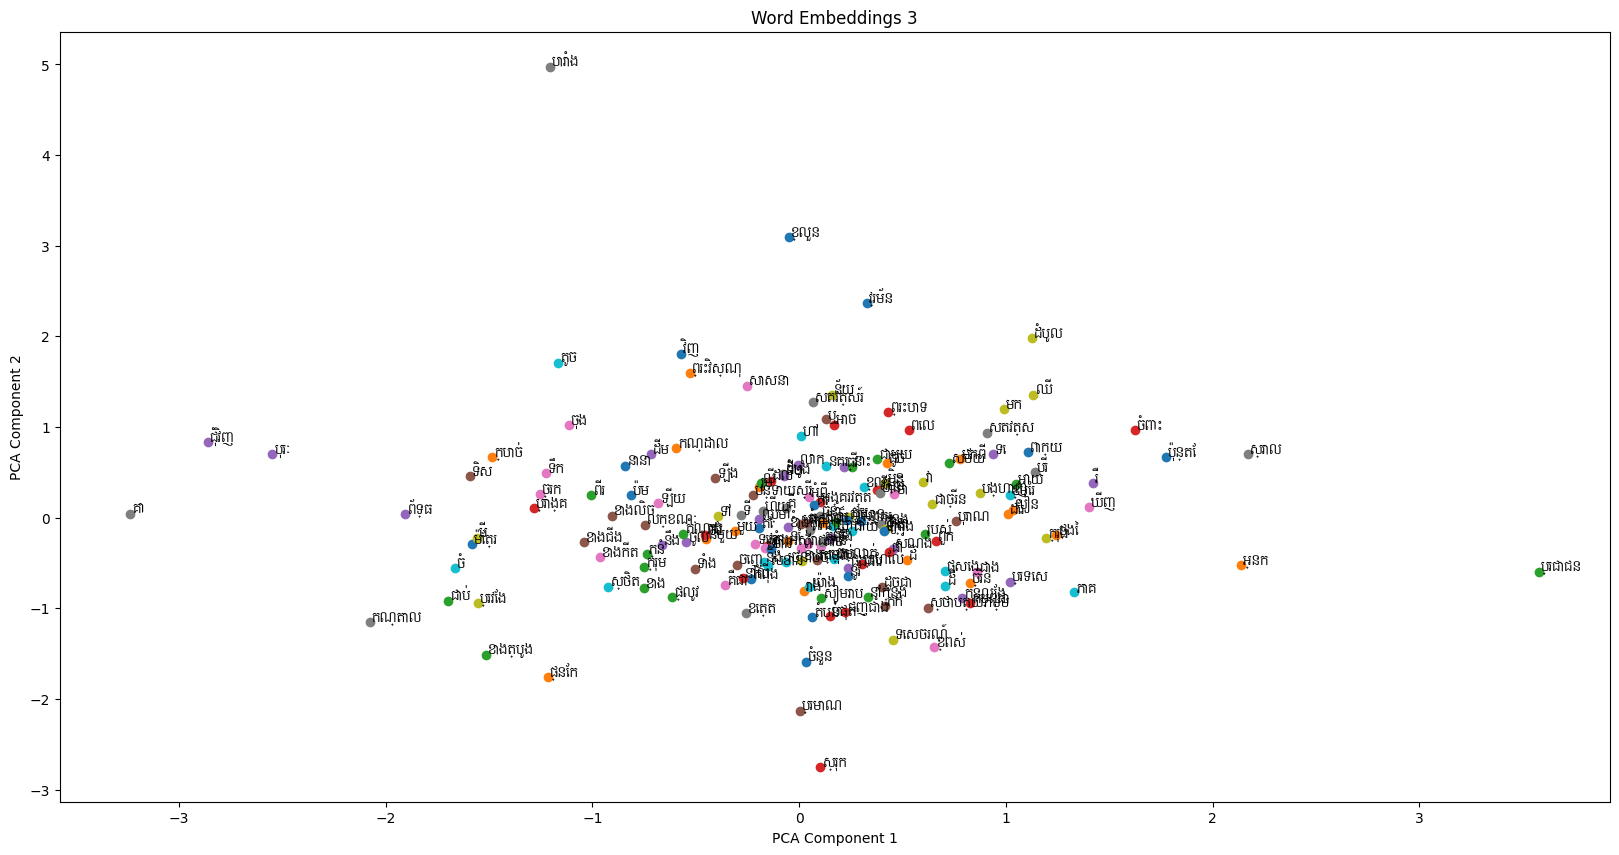

In [13]:
graph3 = load_and_plot_data("word_to_embedding3.npy", "word_to_index.npy", "Word Embeddings 3")

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 85 (U) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78 (N) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 75 (K) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

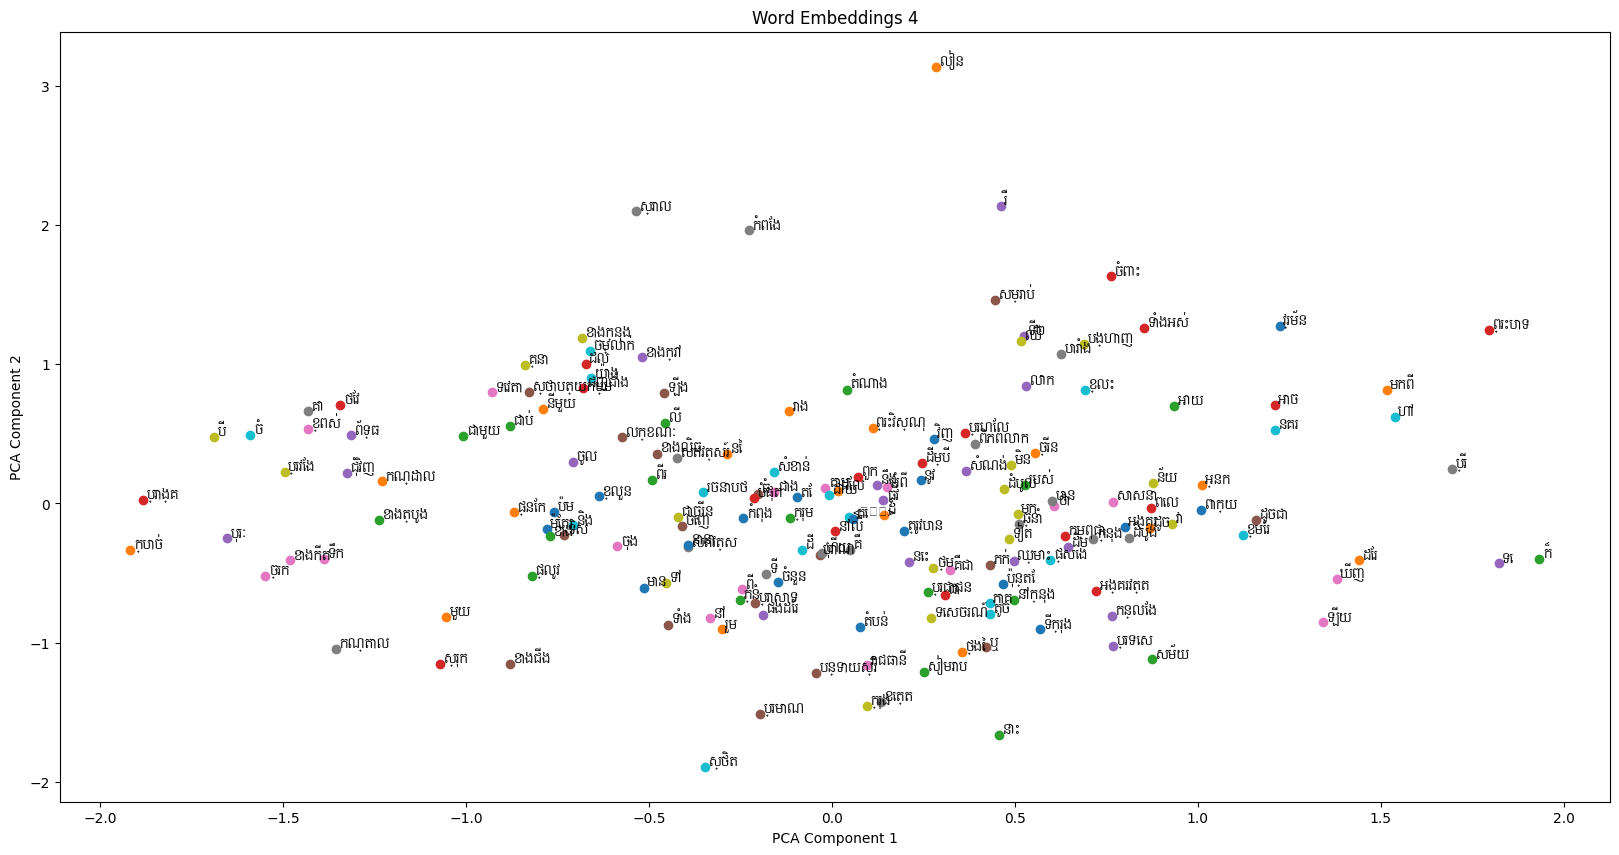

In [14]:
graph4 = load_and_plot_data("word_to_embedding4.npy", "word_to_index.npy", "Word Embeddings 4")

### Embeddings Extract from Scratch (IV.)

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 85 (U) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78 (N) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 75 (K) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

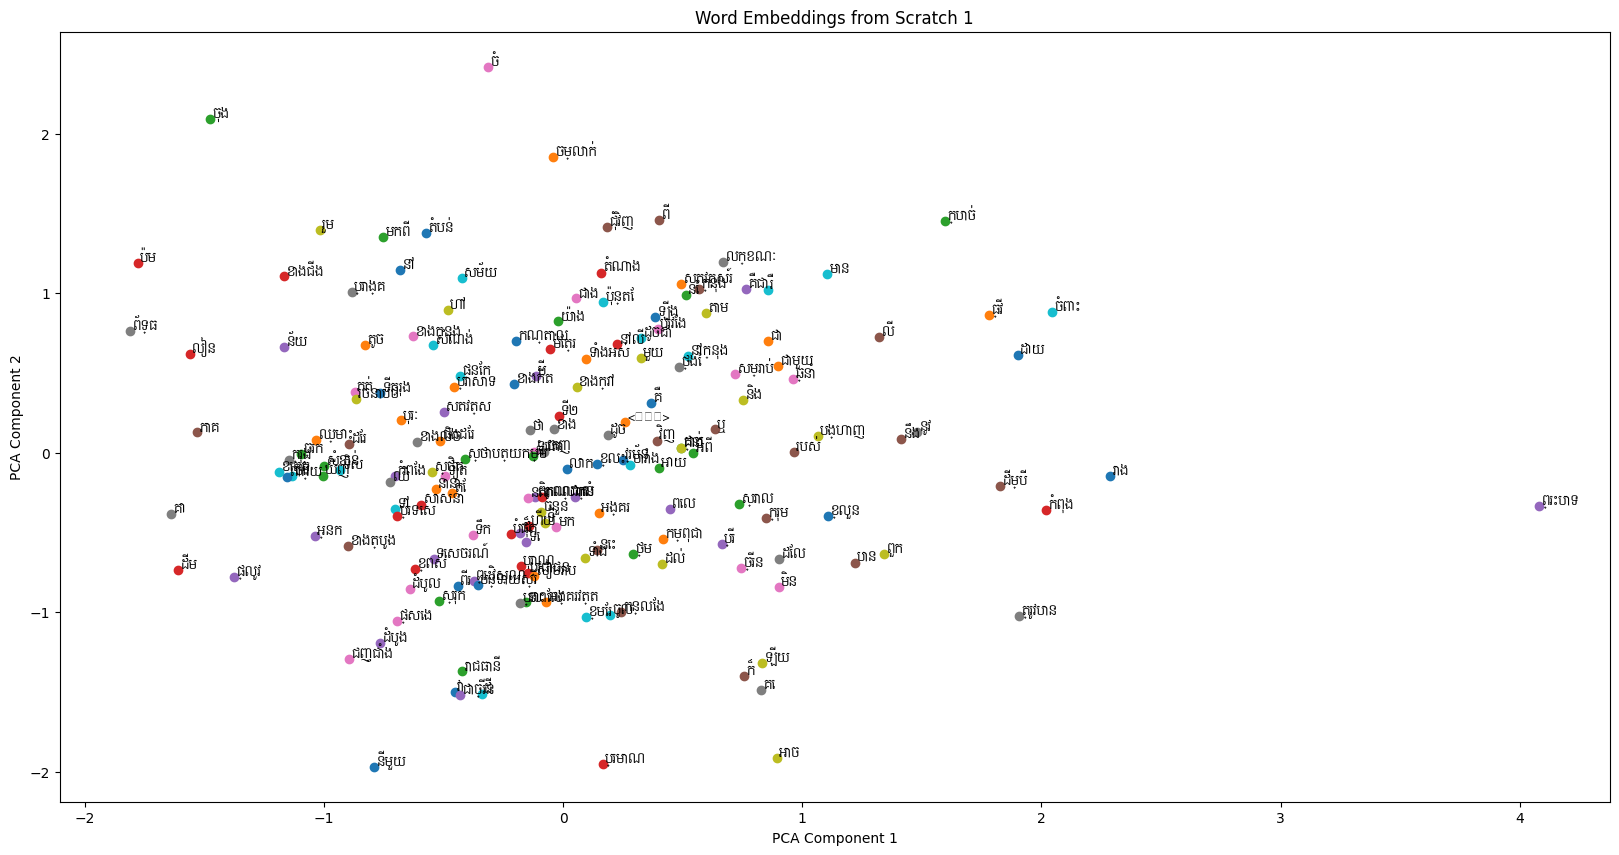

In [14]:
graph5 = load_and_plot_data("scratch_word_to_embedding1.npy", "word_to_index.npy", "Word Embeddings from Scratch 1")

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 85 (U) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78 (N) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 75 (K) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

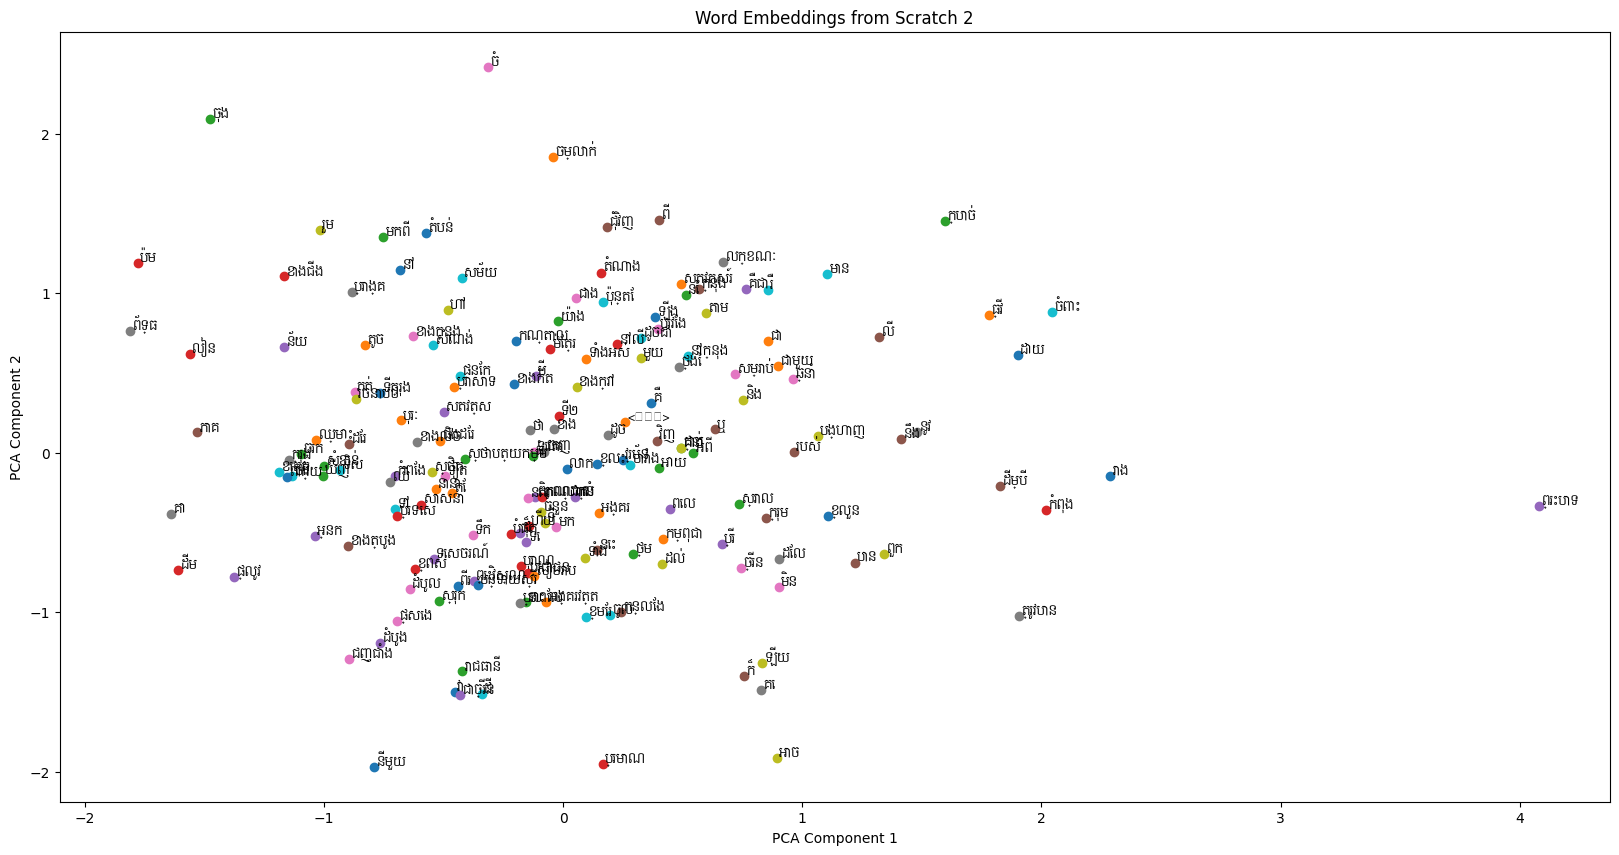

In [15]:
graph6 = load_and_plot_data("scratch_word_to_embedding2.npy", "word_to_index.npy", "Word Embeddings from Scratch 2")

## Discussion
From the graph visualizations above, we can argue that the embedding graph number 2 is better than other since there many similar pair words such as `ខាងត្បូង`-`ខាងកើត`, `ខាងលិច`-`ខាងជើង`,`ស្ថិត`-`ជុំវិញ`,...